___
<a href='http://www.kgptalkie.com'><img src='kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a></em></center>

## Boosting Algorithms | Ada Boost | XGBoost | Cat Boost

### What is Boosting

Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones. Boosting is a general ensemble method that can be used to improve the performance of any machine learning algorithm.

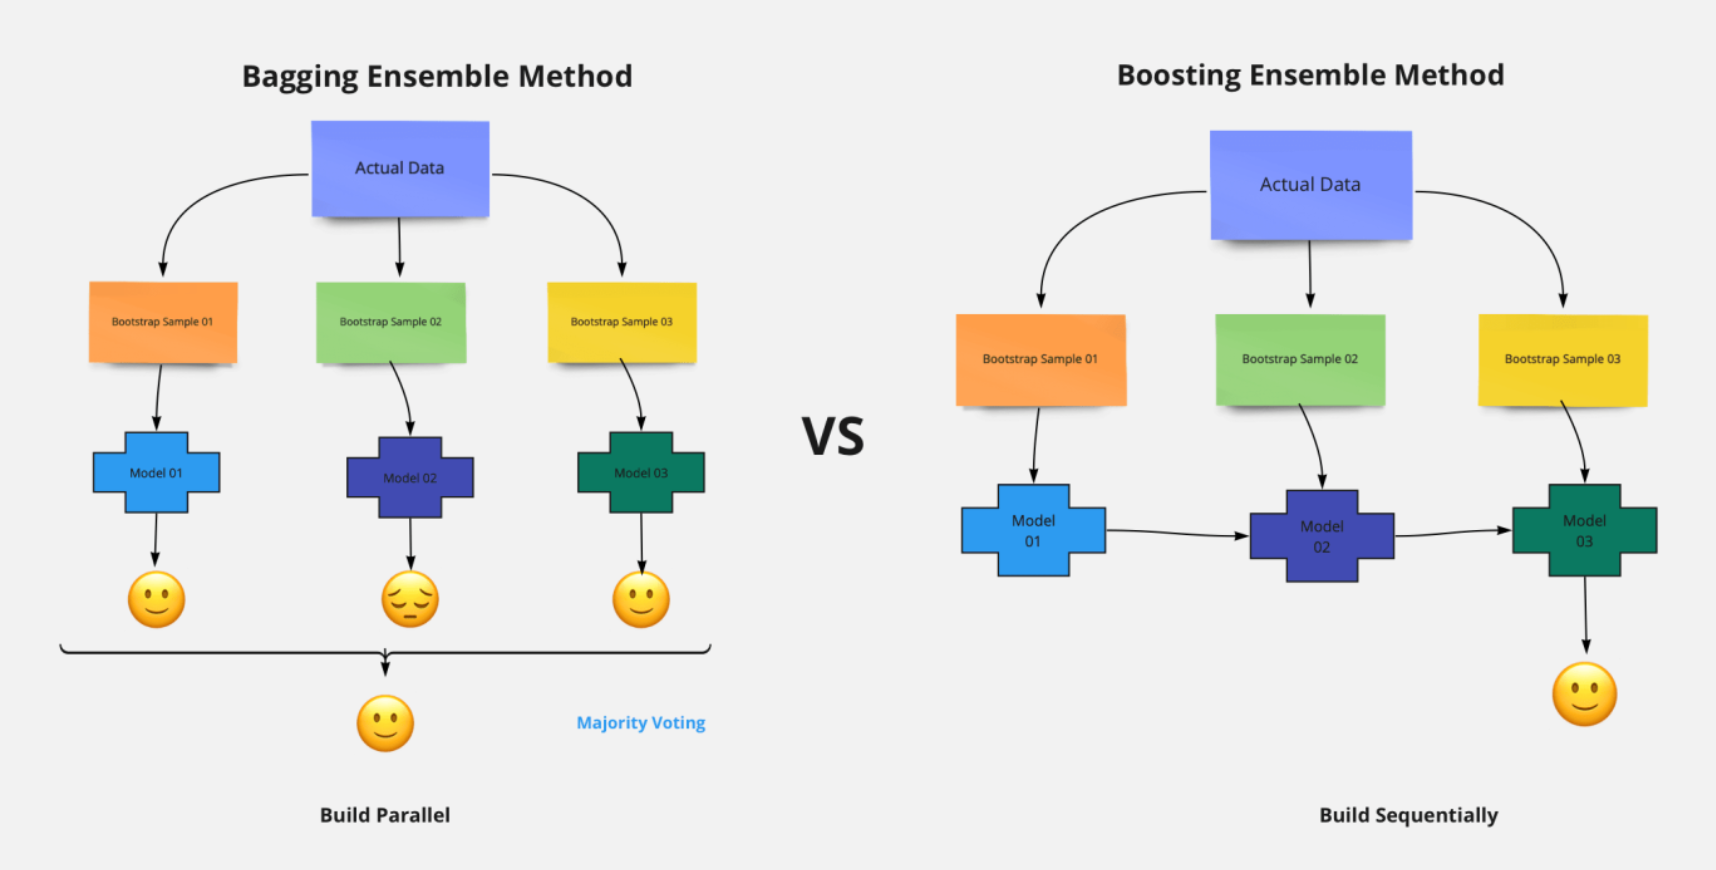

Examples of boosting algorithms are AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost, etc.

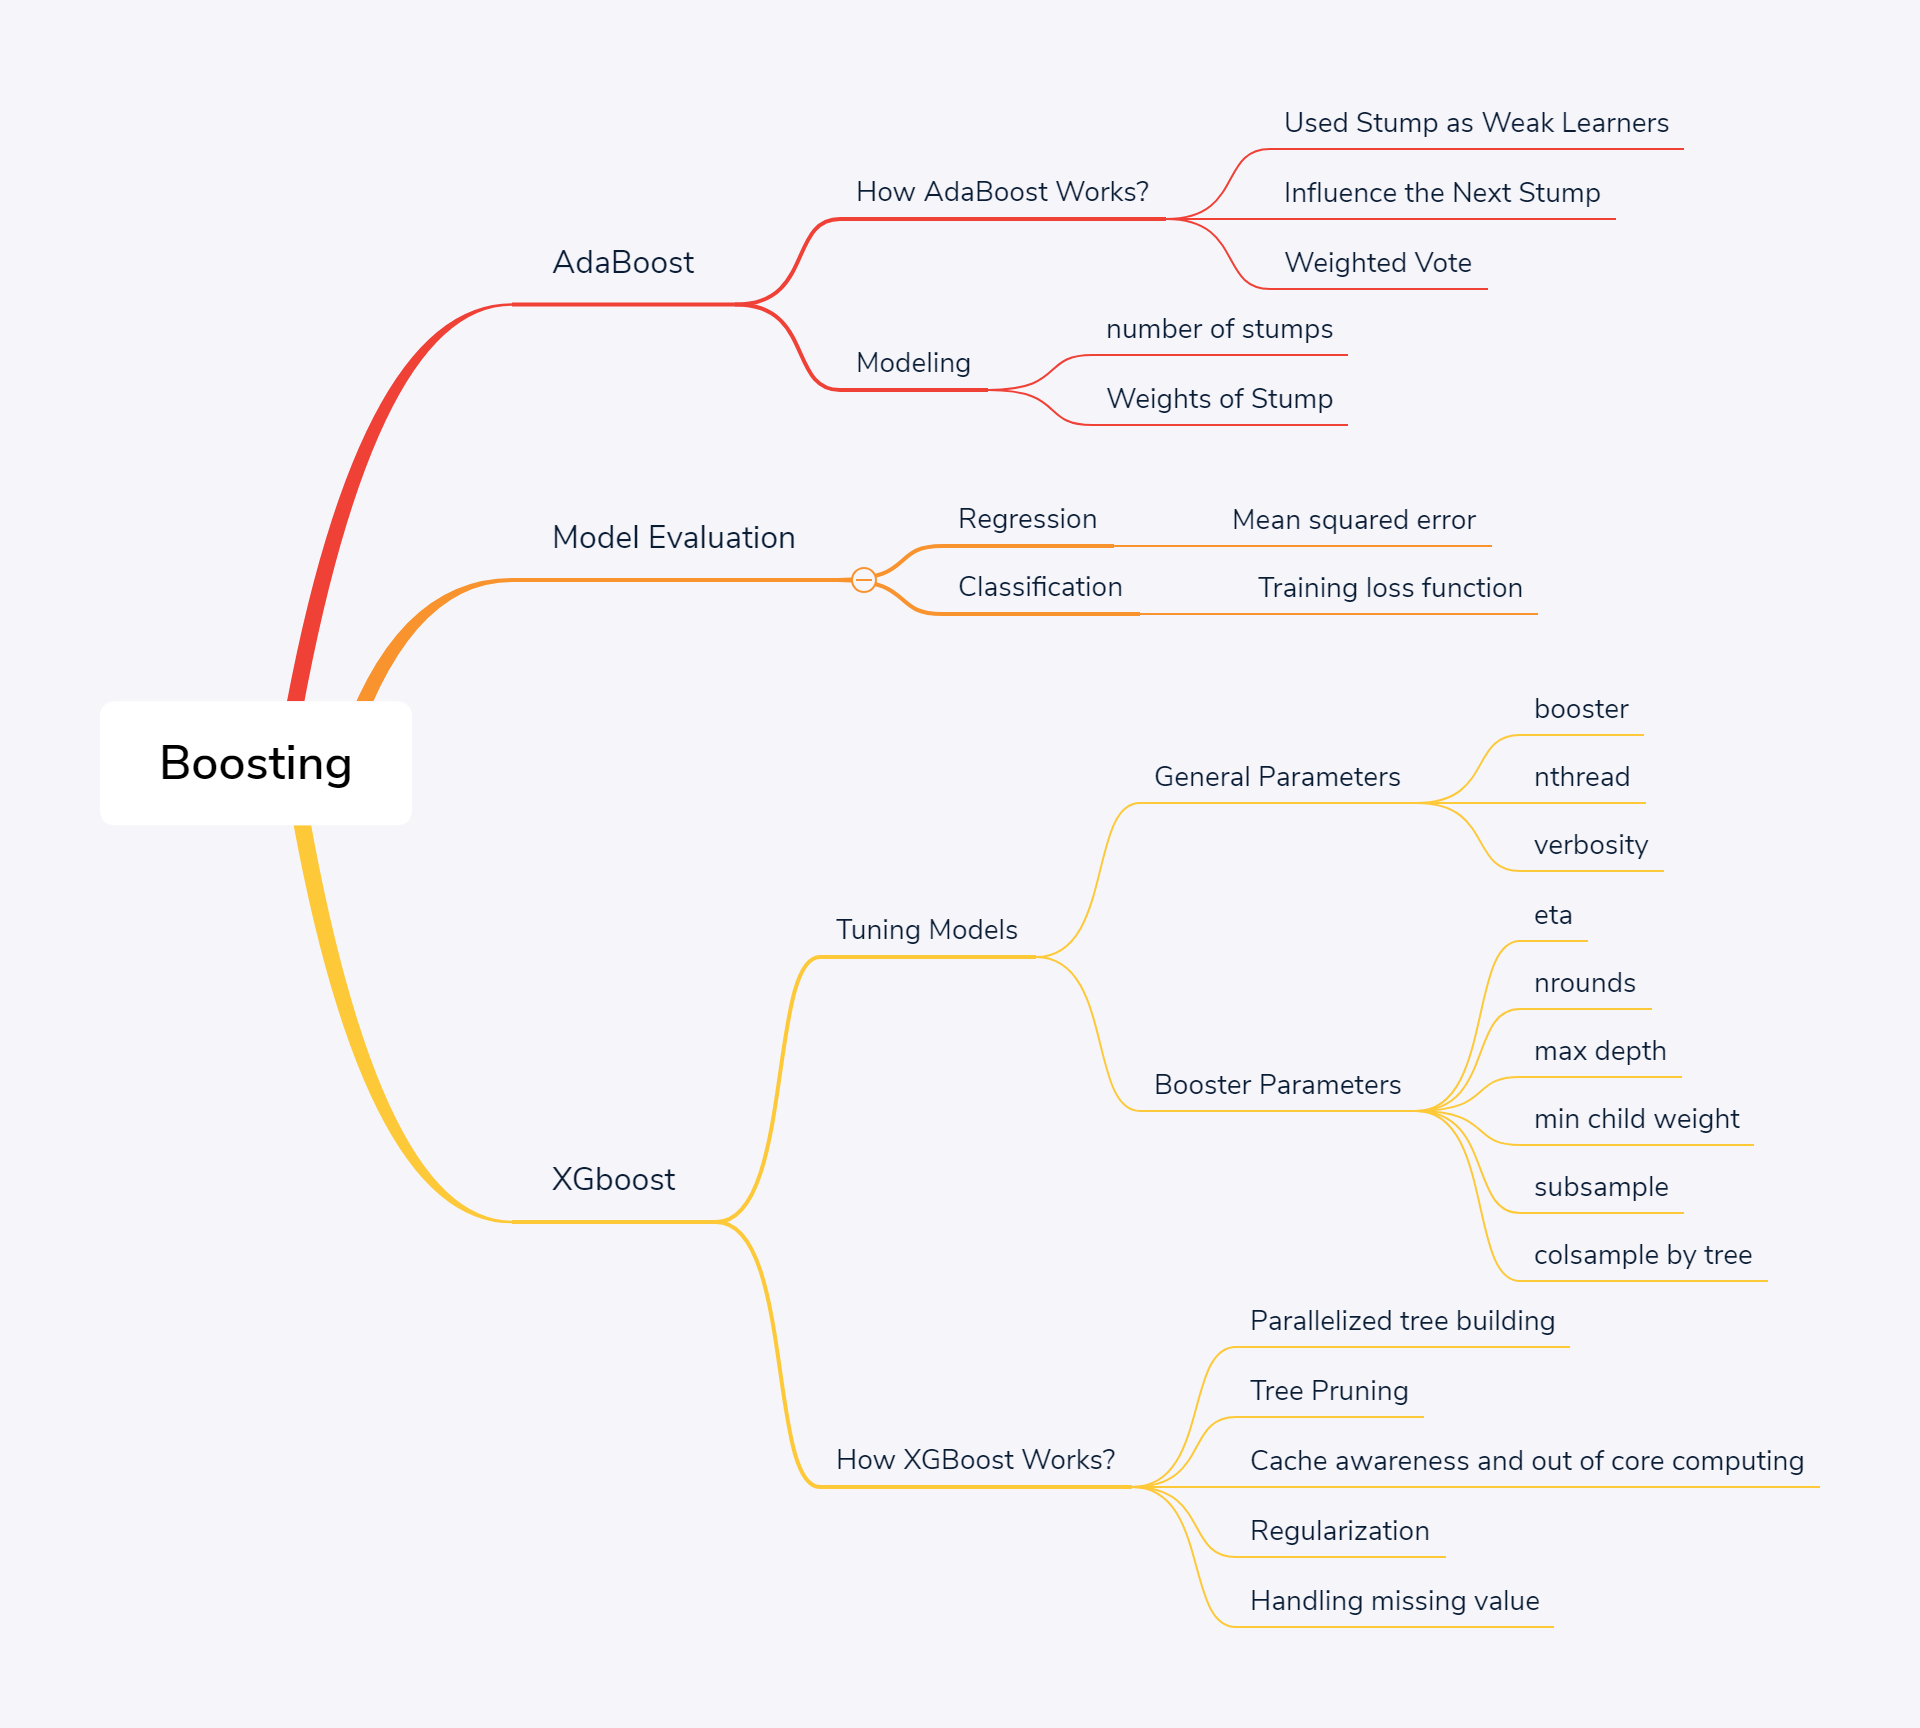

### Ada Boost (Adaptive Boosting)

- AdaBoost is a boosting algorithm based on the idea of weighted majority voting. It is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. It is a popular algorithm and is used frequently in applied machine learning.
- It was the first really successful boosting algorithm developed for binary classification problems (although it can be used for multi-class classification as well).
- The major challenge in boosting is to convert a set of weak classifiers into a strong one. AdaBoost does this by focusing more on the misclassified labels and tries to give more importance to them in the subsequent rounds.

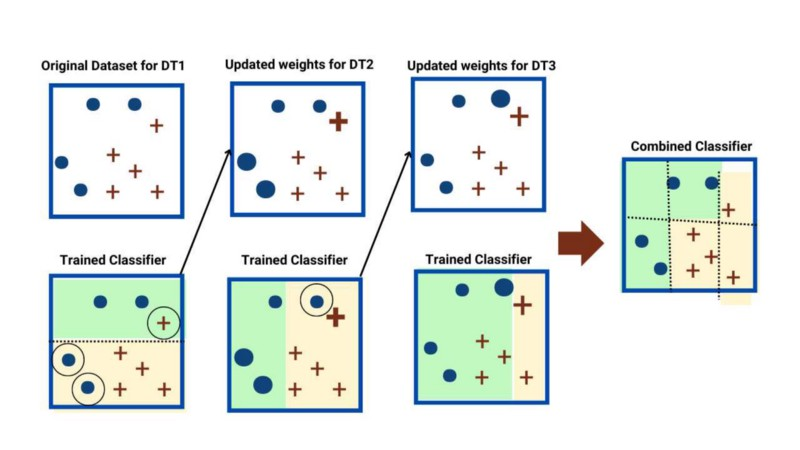

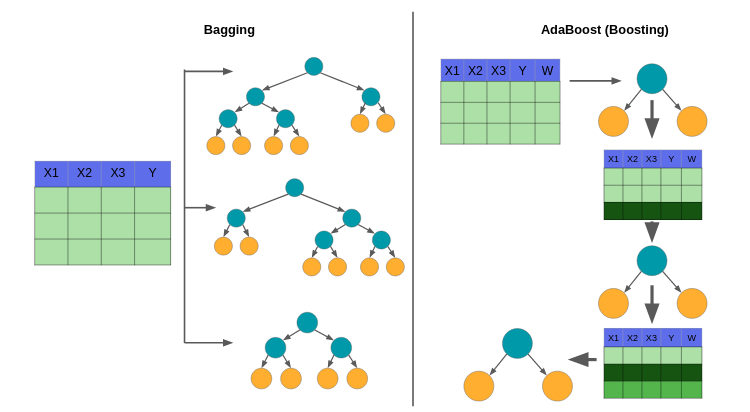

- The issue with AdaBoost is that it is sensitive to noisy data and outliers.
- It can also be computationally expensive as it requires retraining the model at each iteration.
- It is also prone to overfitting. 

### Dataset

Link: https://archive-beta.ics.uci.edu/dataset/45/heart+disease
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. 


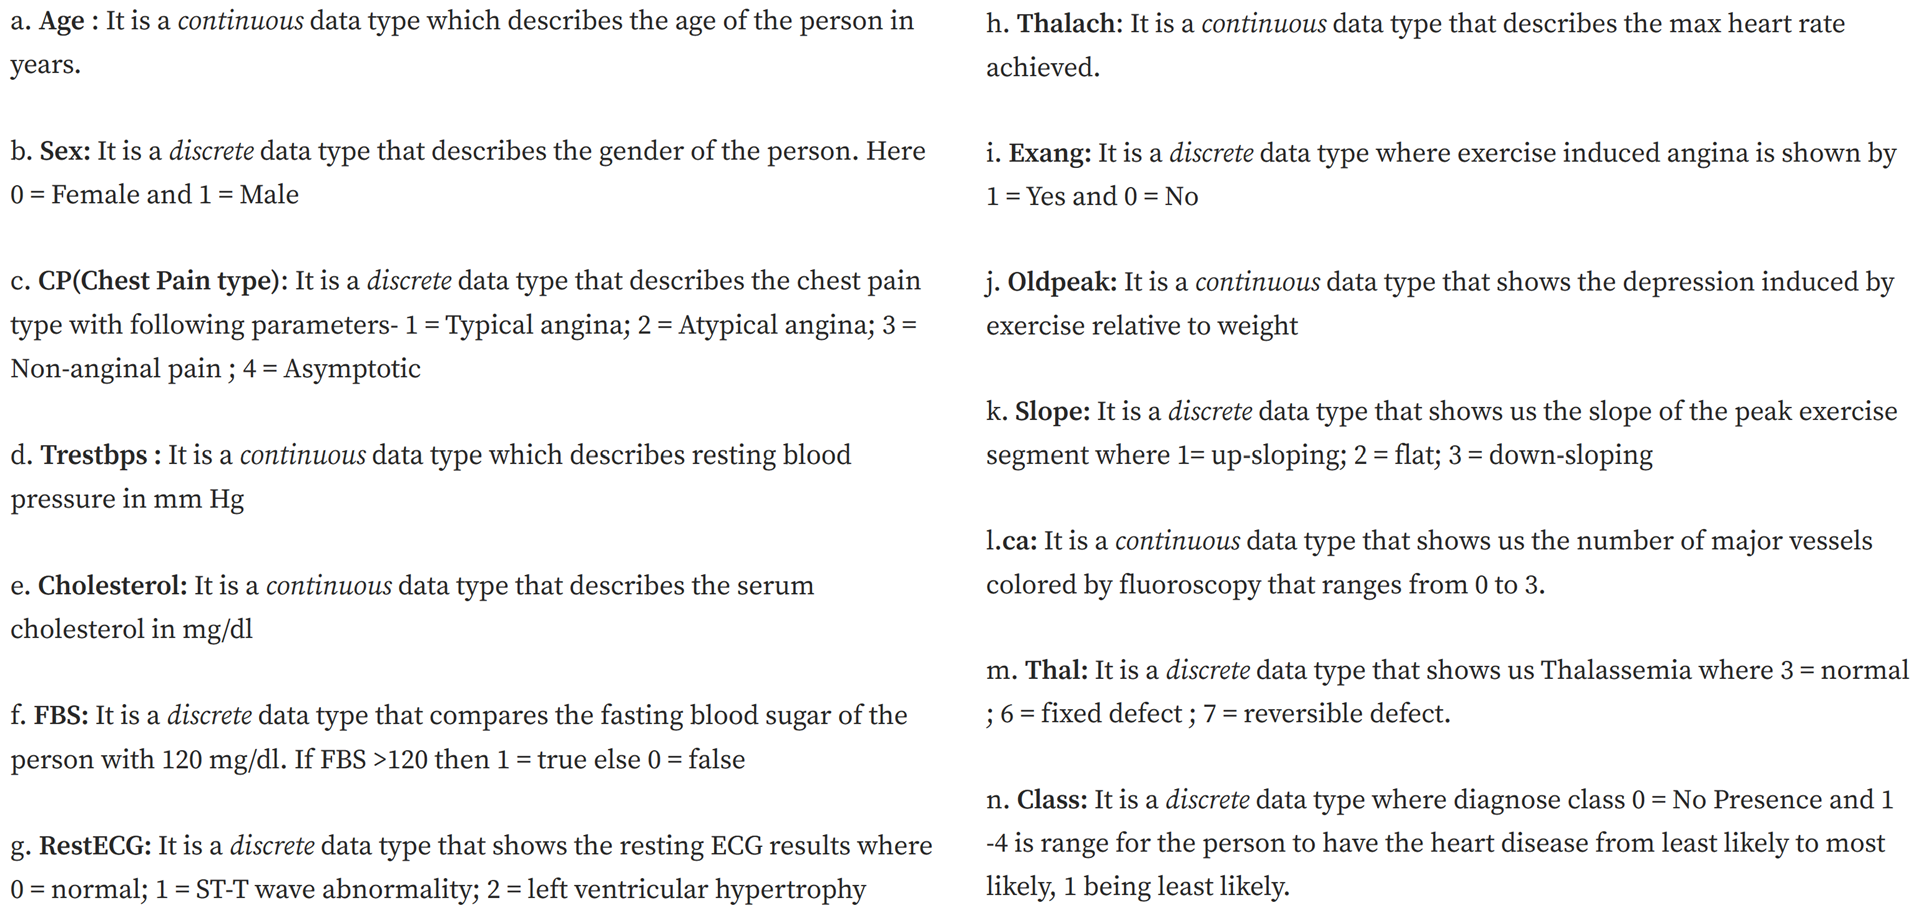

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

### Data Visualization 

In [11]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df[cat_cols] = df[cat_cols].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    object 
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    object 
 6   restecg   302 non-null    object 
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    object 
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    object 
 11  ca        302 non-null    int64  
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 33.2+ KB


In [12]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.dpi'] = 200


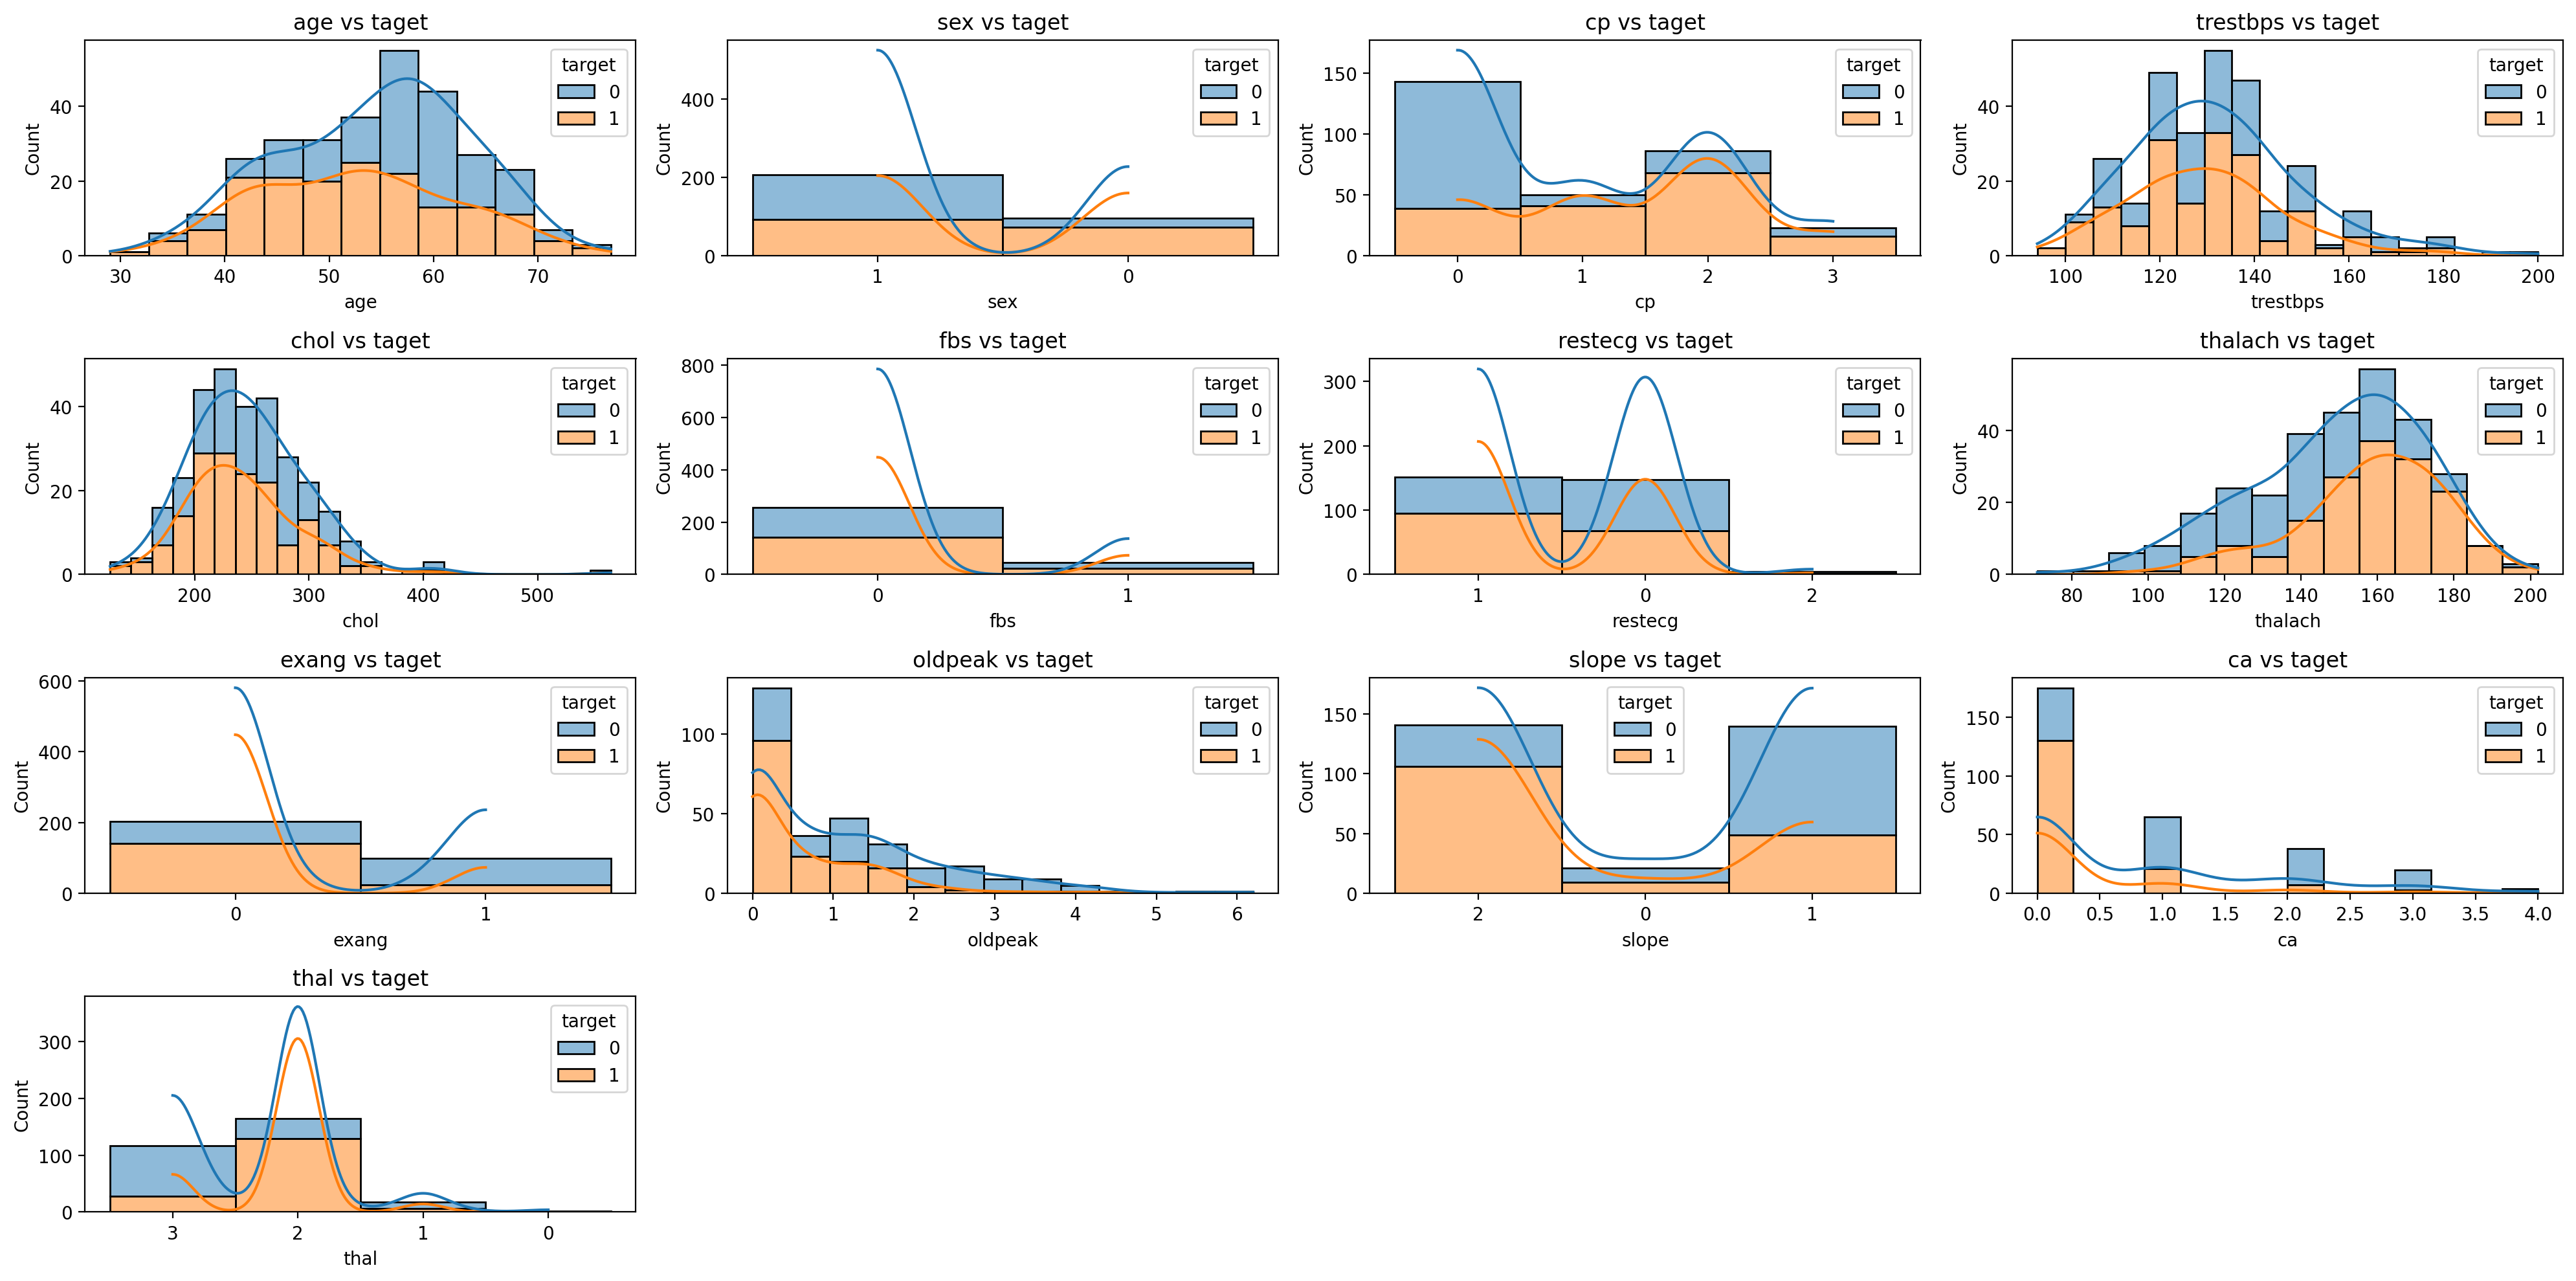

In [18]:
columns = df.columns[:-1]
for i, col in enumerate(columns):
    plt.subplot(4,4, i+1)
    sns.histplot(x=col, data=df, hue='target', multiple='stack', kde=True)
    plt.xlabel(col)
    plt.title("{} vs taget".format(col))
    plt.tight_layout()

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
X = df.drop('target', axis=1)
y = df['target']

In [24]:
X = pd.get_dummies(X, drop_first=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42,
                                                   stratify=y)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
scaler.scale_

array([ 9.00526218, 16.76738996, 53.77770955, 22.47272949,  1.1466078 ,
        1.0506696 ,  0.46786877,  0.36829086,  0.45771227,  0.26288853,
        0.34377287,  0.4999957 ,  0.12775771,  0.45771227,  0.4977178 ,
        0.49978904,  0.22590303,  0.49903059,  0.4912064 ])

### AdaBoost Model Building and Evaluation

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.7704918032786885


Text(91.44444444444443, 0.5, 'True')

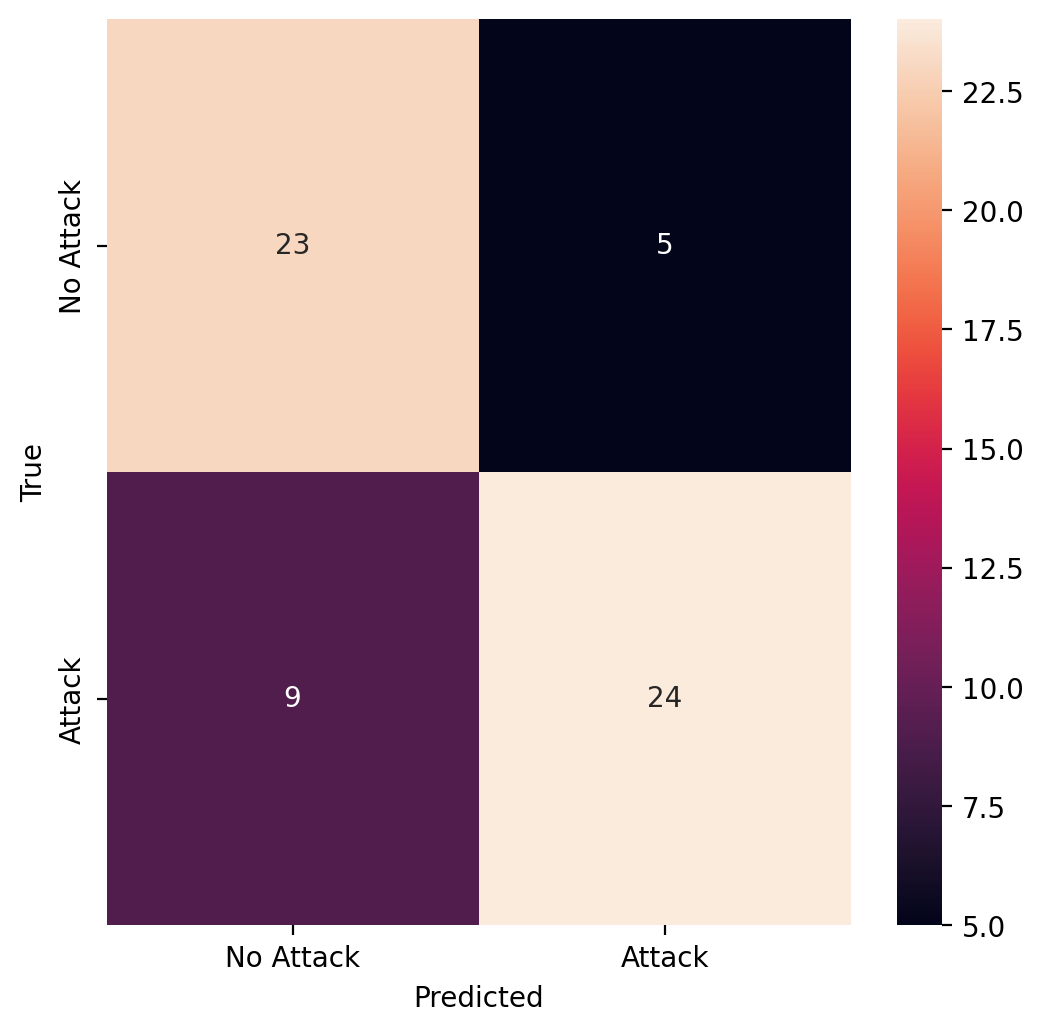

In [35]:
plt.figure(figsize=(6,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, 
            xticklabels=['No Attack', 'Attack'], 
            yticklabels=['No Attack', 'Attack'])

plt.xlabel('Predicted')
plt.ylabel('True')

In [38]:
#hyperparameter Tuning and cross validation
from sklearn.model_selection import GridSearchCV

ada = AdaBoostClassifier()

params = {'n_estimators': [50, 100, 150, 200, 250],
         'learning_rate': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(ada, param_grid=params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [40]:
grid.best_params_, grid.best_score_

({'learning_rate': 0.1, 'n_estimators': 150}, 0.7968537414965986)

In [41]:
y_pred = grid.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.819672131147541


In [42]:
print('classification report\n', classification_report(y_test, y_pred))

classification report
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### XGBoost (eXtreme Gradient Boosting)

https://xgboost.readthedocs.io/en/stable/

- It is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
- It is an implementation of gradient boosted decision trees designed for speed and performance.
- The main objective of XGBoost is to provide a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.


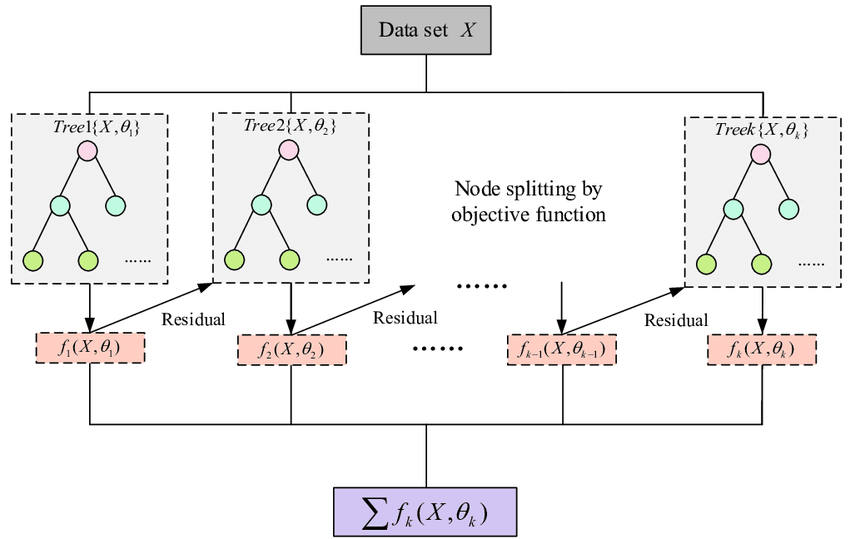

In [44]:
# !pip install xgboost

In [45]:
from xgboost import XGBClassifier

In [46]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print('accuracy score:', accuracy_score(y_test, y_pred))

accuracy score: 0.7540983606557377


In [58]:
xgb = XGBClassifier()
params = {'n_estimators': [300, 350, 400],
         'learning_rate': [0.01, 0.1, 1], 
         'max_depth': [1,2,3,4,5],
         'lambda': [3, 4, 5]}

grid = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [59]:
grid.best_params_, grid.best_score_

({'lambda': 5, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 350},
 0.8047619047619048)

In [60]:
y_pred = grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.8032786885245902

### Cat Boost (Categorical Boosting)

https://catboost.ai/
- CATBoost is a machine learning algorithm that uses gradient boosting on decision trees. It is a type of ensemble learning method, which combines several weak models to produce a powerful ensemble model.
- The main advantage of using CatBoost is that it can automatically handle categorical variables. It is also robust to outliers and missing values.
- It is also faster than other boosting algorithms and can handle large datasets with ease.
- It is also capable of handling high cardinality categorical features.
- The algorithm uses binary symmetric decision trees


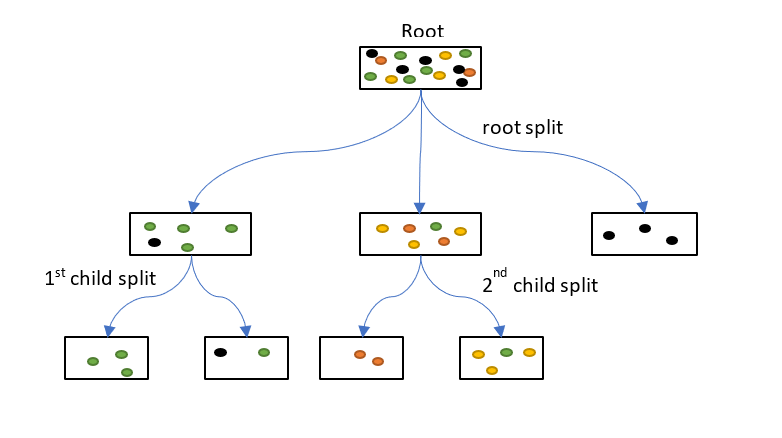

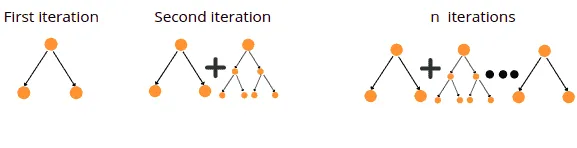

Similar to the Gradient Boosting and XGBoost algorithms, the CatBoost algorithm creates several binary decision trees each time trying to reduce the error:

In [62]:
# !pip install catboost

In [63]:
from catboost import CatBoostClassifier

In [65]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

Learning rate set to 0.005611
0:	learn: 0.6879916	total: 1.4ms	remaining: 1.4s
1:	learn: 0.6836448	total: 2.86ms	remaining: 1.43s
2:	learn: 0.6793028	total: 4.24ms	remaining: 1.41s
3:	learn: 0.6747151	total: 5.66ms	remaining: 1.41s
4:	learn: 0.6701426	total: 7.16ms	remaining: 1.42s
5:	learn: 0.6659928	total: 8.61ms	remaining: 1.43s
6:	learn: 0.6619987	total: 10ms	remaining: 1.42s
7:	learn: 0.6580310	total: 11.5ms	remaining: 1.43s
8:	learn: 0.6545913	total: 12.8ms	remaining: 1.41s
9:	learn: 0.6502593	total: 14.2ms	remaining: 1.41s
10:	learn: 0.6465863	total: 15.6ms	remaining: 1.4s
11:	learn: 0.6434534	total: 17ms	remaining: 1.4s
12:	learn: 0.6399455	total: 18.5ms	remaining: 1.41s
13:	learn: 0.6372669	total: 20.1ms	remaining: 1.42s
14:	learn: 0.6332144	total: 21.8ms	remaining: 1.43s
15:	learn: 0.6298539	total: 23.5ms	remaining: 1.45s
16:	learn: 0.6262592	total: 25.6ms	remaining: 1.48s
17:	learn: 0.6224917	total: 28.5ms	remaining: 1.55s
18:	learn: 0.6193326	total: 30.4ms	remaining: 1.57s


280:	learn: 0.2669208	total: 376ms	remaining: 962ms
281:	learn: 0.2663557	total: 377ms	remaining: 961ms
282:	learn: 0.2658746	total: 379ms	remaining: 959ms
283:	learn: 0.2654600	total: 380ms	remaining: 957ms
284:	learn: 0.2649241	total: 381ms	remaining: 956ms
285:	learn: 0.2644383	total: 382ms	remaining: 954ms
286:	learn: 0.2639555	total: 383ms	remaining: 952ms
287:	learn: 0.2634031	total: 384ms	remaining: 950ms
288:	learn: 0.2629496	total: 386ms	remaining: 949ms
289:	learn: 0.2624251	total: 387ms	remaining: 947ms
290:	learn: 0.2620095	total: 388ms	remaining: 946ms
291:	learn: 0.2615584	total: 390ms	remaining: 945ms
292:	learn: 0.2610648	total: 391ms	remaining: 944ms
293:	learn: 0.2604109	total: 393ms	remaining: 944ms
294:	learn: 0.2597555	total: 395ms	remaining: 943ms
295:	learn: 0.2591590	total: 396ms	remaining: 942ms
296:	learn: 0.2587023	total: 397ms	remaining: 941ms
297:	learn: 0.2581563	total: 399ms	remaining: 939ms
298:	learn: 0.2573869	total: 400ms	remaining: 938ms
299:	learn: 

579:	learn: 0.1658401	total: 759ms	remaining: 549ms
580:	learn: 0.1655255	total: 760ms	remaining: 548ms
581:	learn: 0.1652762	total: 761ms	remaining: 547ms
582:	learn: 0.1651548	total: 762ms	remaining: 545ms
583:	learn: 0.1649935	total: 763ms	remaining: 544ms
584:	learn: 0.1647017	total: 765ms	remaining: 542ms
585:	learn: 0.1644080	total: 766ms	remaining: 541ms
586:	learn: 0.1640792	total: 767ms	remaining: 540ms
587:	learn: 0.1639024	total: 769ms	remaining: 539ms
588:	learn: 0.1637140	total: 770ms	remaining: 537ms
589:	learn: 0.1635396	total: 771ms	remaining: 536ms
590:	learn: 0.1634234	total: 772ms	remaining: 534ms
591:	learn: 0.1632506	total: 774ms	remaining: 533ms
592:	learn: 0.1631182	total: 775ms	remaining: 532ms
593:	learn: 0.1629896	total: 776ms	remaining: 531ms
594:	learn: 0.1628158	total: 778ms	remaining: 529ms
595:	learn: 0.1626278	total: 779ms	remaining: 528ms
596:	learn: 0.1623340	total: 781ms	remaining: 527ms
597:	learn: 0.1620280	total: 782ms	remaining: 526ms
598:	learn: 

842:	learn: 0.1199368	total: 1.14s	remaining: 212ms
843:	learn: 0.1198677	total: 1.14s	remaining: 211ms
844:	learn: 0.1197350	total: 1.14s	remaining: 209ms
845:	learn: 0.1196441	total: 1.14s	remaining: 208ms
846:	learn: 0.1194749	total: 1.14s	remaining: 207ms
847:	learn: 0.1193700	total: 1.14s	remaining: 205ms
848:	learn: 0.1191819	total: 1.15s	remaining: 204ms
849:	learn: 0.1189204	total: 1.15s	remaining: 203ms
850:	learn: 0.1187175	total: 1.15s	remaining: 201ms
851:	learn: 0.1186004	total: 1.15s	remaining: 200ms
852:	learn: 0.1184838	total: 1.15s	remaining: 198ms
853:	learn: 0.1184569	total: 1.15s	remaining: 197ms
854:	learn: 0.1184022	total: 1.15s	remaining: 196ms
855:	learn: 0.1182138	total: 1.15s	remaining: 194ms
856:	learn: 0.1180179	total: 1.16s	remaining: 193ms
857:	learn: 0.1177980	total: 1.16s	remaining: 191ms
858:	learn: 0.1175942	total: 1.16s	remaining: 190ms
859:	learn: 0.1174417	total: 1.16s	remaining: 189ms
860:	learn: 0.1172571	total: 1.16s	remaining: 188ms
861:	learn: 

In [66]:
accuracy_score(y_test, y_pred)

0.7868852459016393

In [67]:
# hyperparameter optimization
cat = CatBoostClassifier()
params = {'n_estimators': [50, 100, 150, 200, 250],
         'learning_rate': [0.001, 0.01, 0.1, 1],
         'depth': [1, 5, 10, 15, 20]}

grid = GridSearchCV(cat, param_grid=params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

0:	learn: 0.6780853	total: 732us	remaining: 146ms
1:	learn: 0.6495435	total: 1.46ms	remaining: 144ms
2:	learn: 0.6295698	total: 2.07ms	remaining: 136ms
3:	learn: 0.6078878	total: 2.65ms	remaining: 130ms
4:	learn: 0.5921634	total: 3.2ms	remaining: 125ms
5:	learn: 0.5777187	total: 3.77ms	remaining: 122ms
6:	learn: 0.5657500	total: 4.31ms	remaining: 119ms
7:	learn: 0.5553921	total: 4.86ms	remaining: 117ms
8:	learn: 0.5428570	total: 5.43ms	remaining: 115ms
9:	learn: 0.5328466	total: 6.01ms	remaining: 114ms
10:	learn: 0.5238874	total: 6.63ms	remaining: 114ms
11:	learn: 0.5116643	total: 7.33ms	remaining: 115ms
12:	learn: 0.5019066	total: 8.18ms	remaining: 118ms
13:	learn: 0.4954559	total: 8.91ms	remaining: 118ms
14:	learn: 0.4858407	total: 9.75ms	remaining: 120ms
15:	learn: 0.4791633	total: 10.5ms	remaining: 121ms
16:	learn: 0.4766465	total: 11.2ms	remaining: 120ms
17:	learn: 0.4713439	total: 11.9ms	remaining: 121ms
18:	learn: 0.4706201	total: 12.6ms	remaining: 120ms
19:	learn: 0.4638377	tot

C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.74243197 0.73835034 0.74651361 0.74234694 0.73818027 0.74234694
 0.75493197 0.77576531 0.77159864 0.77576531 0.78818027 0.80085034
 0.79676871 0.80918367 0.80085034 0.80501701 0.79243197 0.77993197
 0.75960884 0.77202381 0.79234694 0.80068027 0.79659864 0.78418367
 0.78418367 0.78409864 0.79243197 0.79243197 0.79668367 0.79668367
 0.80901361 0.78835034 0.78835034 0.78010204 0.78426871 0.79668367
 0.79260204 0.78835034 0.79260204 0.79260204 0.80068027 0.78409864
 0.78818027 0.7922619  0.79234694 0.79651361 0.78826531 0.78418367
 0.80068027 0.79243197 0.78826531 0.78409864 0.79243197 0.79234694
 0.78826531 0.76743197 0.75926871 0.75926871 0.74668367 0.74668367
 0.76743197 0.78401361 0.78401361 0.79243197 0.78826531 0.7797619
 0.78409864 0.79234694 0.78835034 0.78835034 0.78401361 0.78401361
 0.78401361 0.76768707 0.77185374 0.73477891 0.7346938

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001CEAF1CC4C0>,
             n_jobs=-1,
             param_grid={'depth': [1, 5, 10, 15, 20],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [68]:
grid.best_params_

{'depth': 1, 'learning_rate': 0.1, 'n_estimators': 200}

In [69]:
grid.best_score_

0.8091836734693878

In [70]:
y_pred = grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.819672131147541

In [74]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

accuracy_score(y_test, y_pred)

Learning rate set to 0.005611
0:	learn: 0.6879368	total: 1.69ms	remaining: 1.69s
1:	learn: 0.6838143	total: 8.77ms	remaining: 4.38s
2:	learn: 0.6800127	total: 10ms	remaining: 3.32s
3:	learn: 0.6748694	total: 11.3ms	remaining: 2.81s
4:	learn: 0.6703444	total: 12.8ms	remaining: 2.54s
5:	learn: 0.6658063	total: 14.8ms	remaining: 2.45s
6:	learn: 0.6621528	total: 15.8ms	remaining: 2.24s
7:	learn: 0.6576434	total: 16.8ms	remaining: 2.08s
8:	learn: 0.6526455	total: 17.8ms	remaining: 1.96s
9:	learn: 0.6491012	total: 18.9ms	remaining: 1.87s
10:	learn: 0.6444124	total: 19.9ms	remaining: 1.78s
11:	learn: 0.6406517	total: 20.8ms	remaining: 1.72s
12:	learn: 0.6369287	total: 21.8ms	remaining: 1.66s
13:	learn: 0.6332294	total: 22.9ms	remaining: 1.61s
14:	learn: 0.6313200	total: 23.6ms	remaining: 1.55s
15:	learn: 0.6264900	total: 24.6ms	remaining: 1.51s
16:	learn: 0.6234180	total: 25.4ms	remaining: 1.47s
17:	learn: 0.6204318	total: 26.4ms	remaining: 1.44s
18:	learn: 0.6165240	total: 27.4ms	remaining: 

338:	learn: 0.2305590	total: 373ms	remaining: 727ms
339:	learn: 0.2300043	total: 374ms	remaining: 726ms
340:	learn: 0.2293846	total: 375ms	remaining: 725ms
341:	learn: 0.2289814	total: 376ms	remaining: 723ms
342:	learn: 0.2283806	total: 377ms	remaining: 722ms
343:	learn: 0.2277897	total: 378ms	remaining: 721ms
344:	learn: 0.2275540	total: 379ms	remaining: 719ms
345:	learn: 0.2270782	total: 380ms	remaining: 718ms
346:	learn: 0.2266413	total: 381ms	remaining: 717ms
347:	learn: 0.2262239	total: 382ms	remaining: 716ms
348:	learn: 0.2259885	total: 383ms	remaining: 714ms
349:	learn: 0.2255876	total: 384ms	remaining: 713ms
350:	learn: 0.2250609	total: 385ms	remaining: 712ms
351:	learn: 0.2249510	total: 386ms	remaining: 710ms
352:	learn: 0.2244705	total: 387ms	remaining: 709ms
353:	learn: 0.2240284	total: 388ms	remaining: 708ms
354:	learn: 0.2236661	total: 389ms	remaining: 706ms
355:	learn: 0.2233901	total: 390ms	remaining: 705ms
356:	learn: 0.2229845	total: 391ms	remaining: 704ms
357:	learn: 

532:	learn: 0.1687510	total: 558ms	remaining: 489ms
533:	learn: 0.1684236	total: 559ms	remaining: 488ms
534:	learn: 0.1681832	total: 560ms	remaining: 487ms
535:	learn: 0.1677735	total: 561ms	remaining: 486ms
536:	learn: 0.1675521	total: 562ms	remaining: 485ms
537:	learn: 0.1672999	total: 563ms	remaining: 483ms
538:	learn: 0.1670839	total: 564ms	remaining: 482ms
539:	learn: 0.1669243	total: 565ms	remaining: 481ms
540:	learn: 0.1667247	total: 566ms	remaining: 480ms
541:	learn: 0.1666049	total: 567ms	remaining: 479ms
542:	learn: 0.1663053	total: 568ms	remaining: 478ms
543:	learn: 0.1662665	total: 569ms	remaining: 477ms
544:	learn: 0.1660095	total: 570ms	remaining: 476ms
545:	learn: 0.1659113	total: 571ms	remaining: 474ms
546:	learn: 0.1655571	total: 571ms	remaining: 473ms
547:	learn: 0.1653507	total: 572ms	remaining: 472ms
548:	learn: 0.1651487	total: 573ms	remaining: 471ms
549:	learn: 0.1648880	total: 574ms	remaining: 470ms
550:	learn: 0.1646123	total: 575ms	remaining: 469ms
551:	learn: 

718:	learn: 0.1315228	total: 743ms	remaining: 290ms
719:	learn: 0.1313615	total: 744ms	remaining: 289ms
720:	learn: 0.1312729	total: 745ms	remaining: 288ms
721:	learn: 0.1311728	total: 746ms	remaining: 287ms
722:	learn: 0.1309415	total: 747ms	remaining: 286ms
723:	learn: 0.1307573	total: 748ms	remaining: 285ms
724:	learn: 0.1306426	total: 749ms	remaining: 284ms
725:	learn: 0.1304873	total: 751ms	remaining: 283ms
726:	learn: 0.1303617	total: 752ms	remaining: 282ms
727:	learn: 0.1302000	total: 753ms	remaining: 281ms
728:	learn: 0.1300507	total: 754ms	remaining: 280ms
729:	learn: 0.1298453	total: 755ms	remaining: 279ms
730:	learn: 0.1296590	total: 756ms	remaining: 278ms
731:	learn: 0.1294952	total: 757ms	remaining: 277ms
732:	learn: 0.1293378	total: 758ms	remaining: 276ms
733:	learn: 0.1292314	total: 759ms	remaining: 275ms
734:	learn: 0.1289828	total: 760ms	remaining: 274ms
735:	learn: 0.1287519	total: 760ms	remaining: 273ms
736:	learn: 0.1286041	total: 761ms	remaining: 272ms
737:	learn: 

903:	learn: 0.1044404	total: 931ms	remaining: 98.9ms
904:	learn: 0.1042947	total: 933ms	remaining: 97.9ms
905:	learn: 0.1041123	total: 934ms	remaining: 96.9ms
906:	learn: 0.1039810	total: 935ms	remaining: 95.8ms
907:	learn: 0.1038937	total: 936ms	remaining: 94.8ms
908:	learn: 0.1038231	total: 937ms	remaining: 93.8ms
909:	learn: 0.1036287	total: 938ms	remaining: 92.7ms
910:	learn: 0.1034861	total: 939ms	remaining: 91.7ms
911:	learn: 0.1033470	total: 940ms	remaining: 90.7ms
912:	learn: 0.1032241	total: 941ms	remaining: 89.7ms
913:	learn: 0.1031230	total: 942ms	remaining: 88.6ms
914:	learn: 0.1029789	total: 943ms	remaining: 87.6ms
915:	learn: 0.1028510	total: 944ms	remaining: 86.6ms
916:	learn: 0.1026557	total: 946ms	remaining: 85.6ms
917:	learn: 0.1024962	total: 948ms	remaining: 84.6ms
918:	learn: 0.1023465	total: 949ms	remaining: 83.6ms
919:	learn: 0.1021852	total: 950ms	remaining: 82.6ms
920:	learn: 0.1020381	total: 951ms	remaining: 81.6ms
921:	learn: 0.1019198	total: 952ms	remaining: 

0.8360655737704918

In [84]:
cat = CatBoostClassifier(learning_rate=1, n_estimators=50)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

accuracy_score(y_test, y_pred)

0:	learn: 0.4632801	total: 773us	remaining: 37.9ms
1:	learn: 0.3798526	total: 1.56ms	remaining: 37.4ms
2:	learn: 0.3457830	total: 2.22ms	remaining: 34.8ms
3:	learn: 0.3116260	total: 2.83ms	remaining: 32.6ms
4:	learn: 0.2746685	total: 3.5ms	remaining: 31.5ms
5:	learn: 0.2534942	total: 4.25ms	remaining: 31.2ms
6:	learn: 0.2350548	total: 5.08ms	remaining: 31.2ms
7:	learn: 0.2107136	total: 6.35ms	remaining: 33.3ms
8:	learn: 0.1945111	total: 7.06ms	remaining: 32.2ms
9:	learn: 0.1861473	total: 7.78ms	remaining: 31.1ms
10:	learn: 0.1851044	total: 8.43ms	remaining: 29.9ms
11:	learn: 0.1740230	total: 9.14ms	remaining: 28.9ms
12:	learn: 0.1566234	total: 9.78ms	remaining: 27.8ms
13:	learn: 0.1465065	total: 10.4ms	remaining: 26.7ms
14:	learn: 0.1359876	total: 10.9ms	remaining: 25.6ms
15:	learn: 0.1306373	total: 11.6ms	remaining: 24.7ms
16:	learn: 0.1301285	total: 12.3ms	remaining: 23.8ms
17:	learn: 0.1236999	total: 12.9ms	remaining: 23ms
18:	learn: 0.1180821	total: 13.7ms	remaining: 22.3ms
19:	lea

0.8360655737704918

# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
